### Data Libraries

In [1]:
# Data Analysis Libraries
import numpy as np
import pandas as pd
import math
import random
import requests

# Data Viz Libraries & modeling
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt

# ML Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score

# ML Model Evaluation
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
url = "https://raw.githubusercontent.com/anasn17/finalproject/main/disaese_heart.csv"

column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, skiprows=[0])

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.shape

(1025, 14)

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Penjelasan :

*   age : umur pasien
*   sex : (1 = Male; 0 = female)
*   cp : Mempresentasikan jenis nyeri dada yang dirasakan oleh pasien dan diberi 4 nilai kategori :
        -- Value 1: typical angina atau angina stabil
        -- Value 2: atypical angina atau angina tidak stabil
        -- Value 3: non-anginal pain atau nyeri dada yang bukan anginal
        -- Value 4: asymptomatic atau tanpa gejala
*   trestbps : Tekanan darah normal mm/hg
*   chol : Kadar kolestrol serum mm/dl
*   fasting blood sugar > 120 mg/dl : FBS mengukur gula darah setelah Anda puasa selama 8 jam. (0=no; 1=yes)
*   restecg : resting ekg (pemeriksaan EKG yang dilakukan saat pasien dalam kondisi istirahat (dalam posisi berbaring)).  (0=menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri; 1=normal;2=memiliki kelainan gelombang ST-T)
*   thalach : detak jantung maksimum
*   exang : Angina Pectoris (Angin Duduk) : terjadi ketika otot jantung tidak mendapatkan suplai darah yang cukup, akibat penyempitan atau penyumbatan pada pembuluh darah arteri di jantung. (1=yes;0=no)
*   oldpeak : depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat
*   slop : (0=downsloping; 1=flat; 2=upsloping)
*   ca : number of major vessels (0–3)
*   thal : variabel ini merepresentasikan hasil tes thalium scan(1=normal; 2=cacat tetap; 3=cacat reversibel)
*   target : (0= tidak ada pemyakit; 1= ada penyakit)

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
# Pelabelan data kategorikal
data['sex'] = data['sex'].replace({1: 'Male',
                                   0: 'Female'})
data['cp'] = data['cp'].replace({0: 'typical angina',
                                 1: 'atypical angina',
                                 2: 'non-anginal pain',
                                 3: 'asymtomatic'})
data['fbs'] = data['fbs'].replace({0: 'No',
                                   1: 'Yes'})
data['restecg'] = data['restecg'].replace({0: 'probable or definite left ventricular hypertrophy',
                                           1:'normal',
                                           2: 'ST-T Wave abnormal'})
data['exang'] = data['exang'].replace({0: 'No',
                                       1: 'Yes'})
data['slope'] = data['slope'].replace({0: 'downsloping',
                                       1: 'flat',
                                       2: 'upsloping'})
data['thal'] = data['thal'].replace({1: 'normal',
                                     2: 'fixed defect',
                                     3: 'reversable defect'})
data['ca'] = data['ca'].replace({0: 'Number of major vessels: 0',
                                 1: 'Number of major vessels: 1',
                                 2: 'Number of major vessels: 2',
                                 3: 'Number of major vessels: 3'})
data['target'] = data['target'].replace({0: 'No disease',
                                         1: 'Disease'})

In [11]:
data['cp']

0        typical angina
1        typical angina
2        typical angina
3        typical angina
4        typical angina
             ...       
1020    atypical angina
1021     typical angina
1022     typical angina
1023     typical angina
1024     typical angina
Name: cp, Length: 1025, dtype: object

In [12]:
# Pisahkan numerical dan categorical
numerical_col = data.select_dtypes(exclude='object')
categorical_col = data.select_dtypes(include='object')

In [13]:
numerical_col

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9
...,...,...,...,...,...
1020,59,140,221,164,0.0
1021,60,125,258,141,2.8
1022,47,110,275,118,1.0
1023,50,110,254,159,0.0


In [14]:
categorical_col.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,Male,typical angina,No,normal,No,upsloping,Number of major vessels: 2,reversable defect,No disease
1,Male,typical angina,Yes,probable or definite left ventricular hypertrophy,Yes,downsloping,Number of major vessels: 0,reversable defect,No disease
2,Male,typical angina,No,normal,Yes,downsloping,Number of major vessels: 0,reversable defect,No disease
3,Male,typical angina,No,normal,No,upsloping,Number of major vessels: 1,reversable defect,No disease
4,Female,typical angina,Yes,normal,No,flat,Number of major vessels: 3,fixed defect,No disease


In [15]:
# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Berikut ini merupakan informasi: {} dengan {}".format(i, data[i].unique()))
    print()

Berikut ini merupakan informasi: sex dengan ['Male' 'Female']

Berikut ini merupakan informasi: cp dengan ['typical angina' 'atypical angina' 'non-anginal pain' 'asymtomatic']

Berikut ini merupakan informasi: fbs dengan ['No' 'Yes']

Berikut ini merupakan informasi: restecg dengan ['normal' 'probable or definite left ventricular hypertrophy'
 'ST-T Wave abnormal']

Berikut ini merupakan informasi: exang dengan ['No' 'Yes']

Berikut ini merupakan informasi: slope dengan ['upsloping' 'downsloping' 'flat']

Berikut ini merupakan informasi: ca dengan ['Number of major vessels: 2' 'Number of major vessels: 0'
 'Number of major vessels: 1' 'Number of major vessels: 3' 4]

Berikut ini merupakan informasi: thal dengan ['reversable defect' 'fixed defect' 'normal' 0]

Berikut ini merupakan informasi: target dengan ['No disease' 'Disease']



Berada pengecekan data kategorikal dalam kolom 'ca' dan 'thal' terdapat kesalahan penulisan

1.   kolom 'ca' : Terdapat 4 nilai dengan rentang 0-3 maka angka 4 yang tidak seharusnya ada akan diubah menjadi nan
2.   kolom 'thal' : Terdapat 4 nilai dengan rentang 0-3 terdapat angka 0 yang perlu diubah menjadi nan karna tidak seharusnya ada



Mencari data yang terdapat kesalahan

Terdapat data sebanyak 18 nilai '4' dalam kolom ca

In [16]:
data.loc[data['ca'] == 4, 'ca'] = np.nan

In [17]:
data['ca'].value_counts()

Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
Name: ca, dtype: int64

Terdapat data sebanyak 7 nilai '0' dalam kolom thal

In [18]:
data.loc[data['thal'] == 0, 'thal'] = np.nan

In [19]:
data['thal'].value_counts()

fixed defect         544
reversable defect    410
normal                64
Name: thal, dtype: int64

In [20]:
data['thal']

0       reversable defect
1       reversable defect
2       reversable defect
3       reversable defect
4            fixed defect
              ...        
1020         fixed defect
1021    reversable defect
1022         fixed defect
1023         fixed defect
1024    reversable defect
Name: thal, Length: 1025, dtype: object

In [21]:
data.loc[data['oldpeak'] == 4.4, 'oldpeak'] = np.nan
data.loc[data['oldpeak'] == 4.2, 'oldpeak'] = np.nan
data['oldpeak'].value_counts()

0.0    329
1.2     58
1.0     51
0.6     47
1.4     44
0.8     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.5     16
1.9     16
0.5     15
3.6     15
2.2     14
4.0     12
2.4     11
0.9     10
3.4     10
0.3     10
3.2      8
2.3      7
2.5      7
1.1      6
5.6      4
3.1      4
3.8      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: oldpeak, dtype: int64

In [22]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     10
slope        0
ca          18
thal         7
target       0
dtype: int64

### Handling missing value

In [23]:
# Fillna pada kolom 'ca' dengan modus
modus_ca = data['ca'].mode()[0]
data['ca'] = data['ca'].fillna(modus_ca)

# Fillna pada kolom 'thal' dengan modus
modus_thal = data['thal'].mode()[0]
data['thal'] = data['thal'].fillna(modus_thal)

# Fillna pada kolom 'oldpeak' dengan modus
modus_oldpeak = data['oldpeak'].mode()[0]
data['oldpeak'] = data['oldpeak'].fillna(modus_oldpeak)

In [24]:
print("Hasil missing value:\n", data.isna().sum())

Hasil missing value:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Handling Duplicated Value

In [25]:
#check duplicate value
data.duplicated().sum()

723

In [26]:
# drop duplicated value
data.drop_duplicates(inplace=True)

data.duplicated().sum()

0

In [27]:
data.shape

(302, 14)

In [28]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical angina,125,212,No,normal,168,No,1.0,upsloping,Number of major vessels: 2,reversable defect,No disease
1,53,Male,typical angina,140,203,Yes,probable or definite left ventricular hypertrophy,155,Yes,3.1,downsloping,Number of major vessels: 0,reversable defect,No disease
2,70,Male,typical angina,145,174,No,normal,125,Yes,2.6,downsloping,Number of major vessels: 0,reversable defect,No disease
3,61,Male,typical angina,148,203,No,normal,161,No,0.0,upsloping,Number of major vessels: 1,reversable defect,No disease
4,62,Female,typical angina,138,294,Yes,normal,106,No,1.9,flat,Number of major vessels: 3,fixed defect,No disease


Handling Outliers

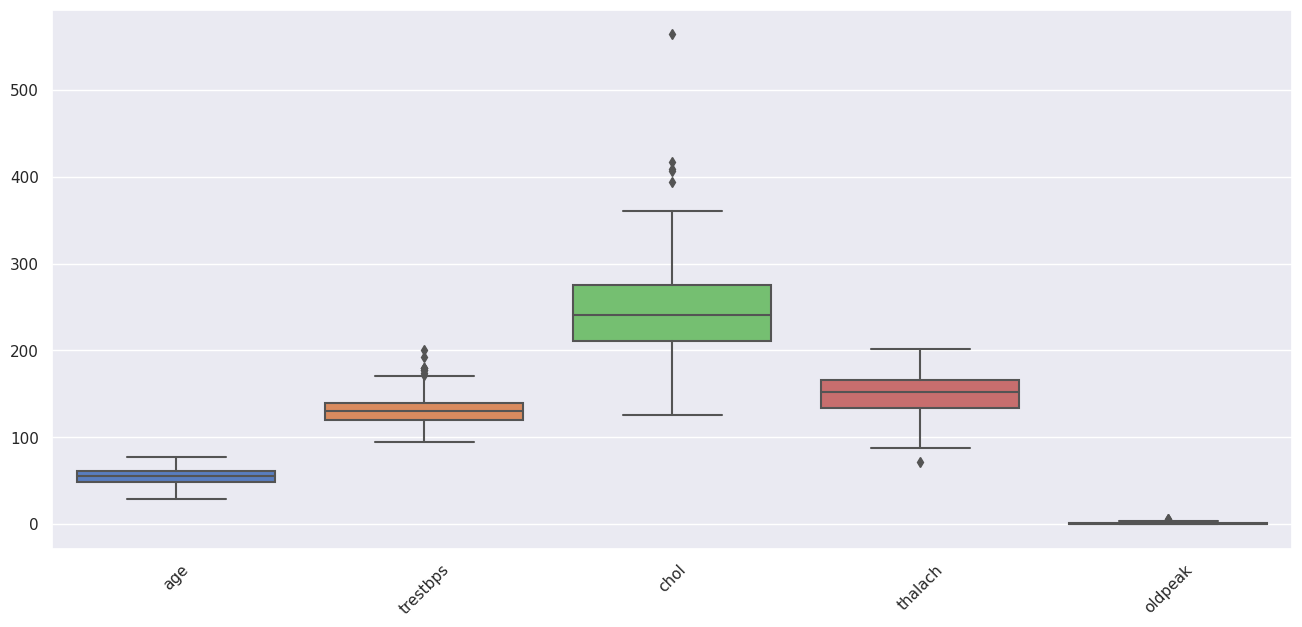

In [29]:
#check outliers
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()


In [30]:
#Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = numerical_col
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~(
            (feature_data >= Q1 - outlier_step) &
            (feature_data <= Q3 + outlier_step)
        )].index.tolist()
        if not drop:
            print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(continous_features, drop=False)

For the feature age, Num of Outliers is 0
For the feature trestbps, Num of Outliers is 30
For the feature chol, Num of Outliers is 16
For the feature thalach, Num of Outliers is 4
For the feature oldpeak, Num of Outliers is 7


In [31]:
# Menghapus outlier dengan fungsi sebelumnya
outliers(continous_features, drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


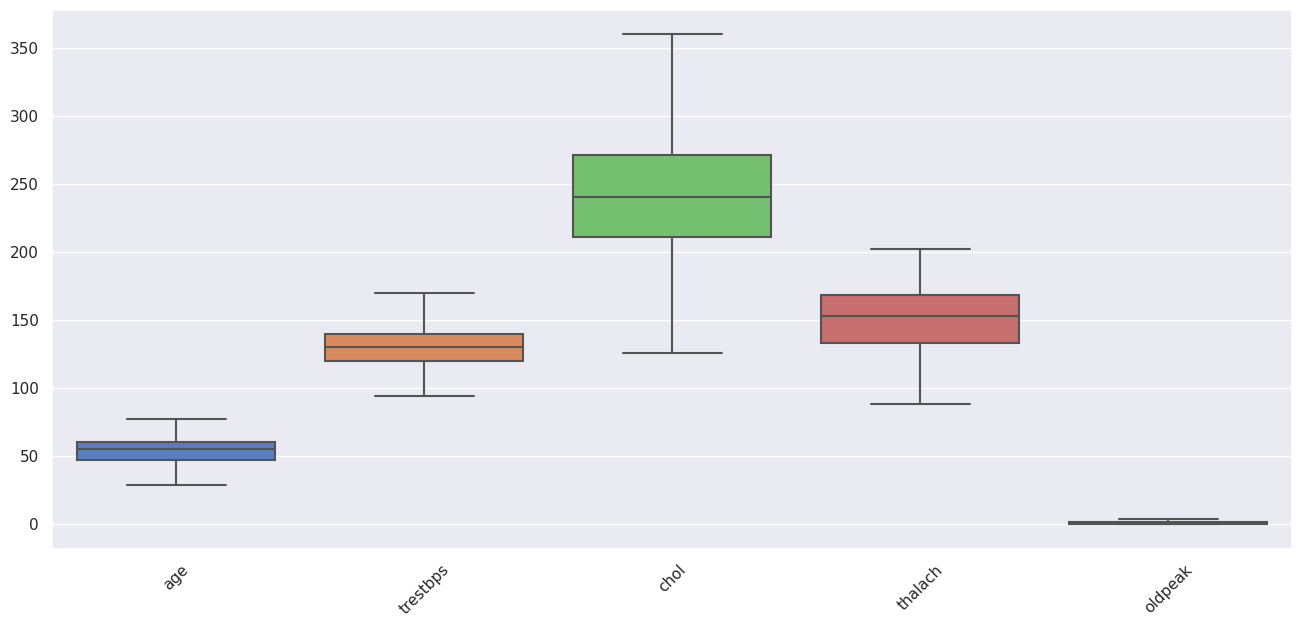

In [32]:
#check outliers
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()


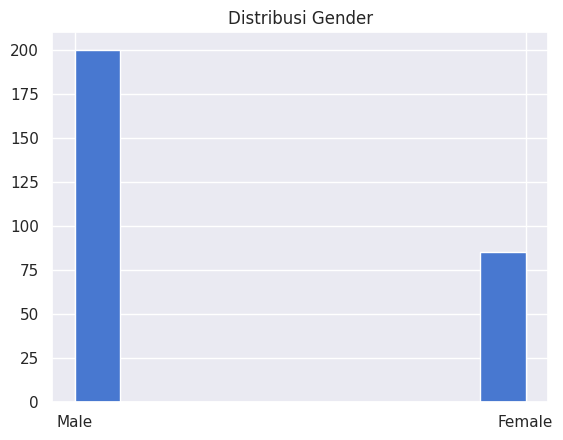

In [33]:
# Jumlah kategori sex pada dataset
data["sex"].hist().plot(kind='bar')
plt.title('Distribusi Gender')
plt.show()

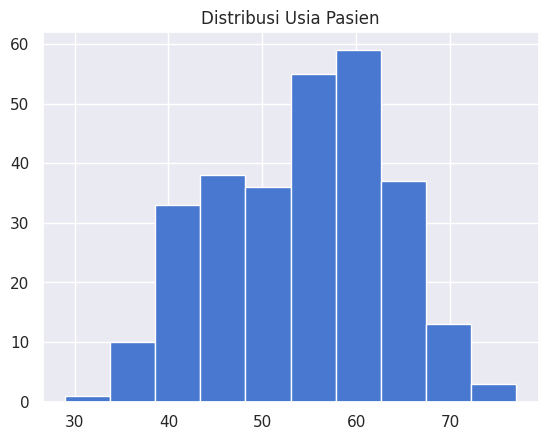

In [34]:
# Jumlah kategori age pada dataset
data.age.hist().plot(kind='bar')
plt.title('Distribusi Usia Pasien')
plt.show()

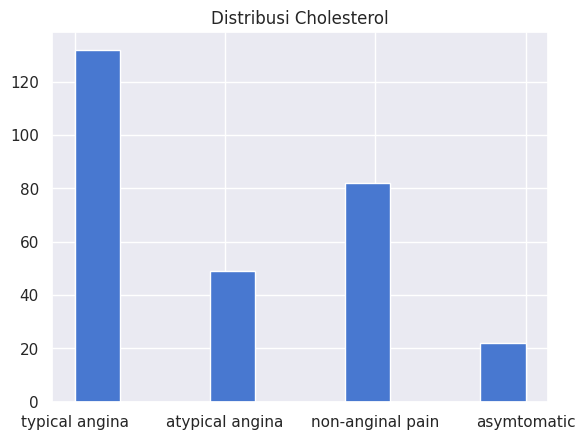

In [35]:
# Jumlah kategori cp pada dataset
data.cp.hist().plot(kind='bar')
plt.title('Distribusi Cholesterol')
plt.show()

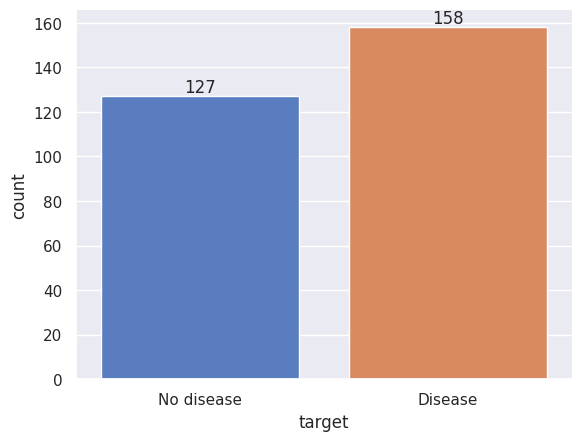

In [36]:
# Memeriksa data imbalance
ax = sns.countplot(data, x="target")
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

In [37]:
data['oldpeak'].value_counts()

0.0    97
1.2    16
0.6    14
1.4    13
0.2    12
1.0    12
0.8    12
1.8    10
0.4     9
2.0     9
1.6     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
2.2     4
0.5     4
3.6     4
1.9     4
0.3     3
0.9     3
2.4     3
2.5     2
3.4     2
3.2     2
1.1     2
2.3     2
3.8     1
1.3     1
2.9     1
2.1     1
4.0     1
3.1     1
0.7     1
3.5     1
Name: oldpeak, dtype: int64

In [38]:
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,285.000000,285.000000,285.000000,285.000000,285.000000
mean,54.052632,129.863158,242.775439,149.828070,0.945263
std,9.100807,15.374167,44.842276,22.679687,1.025873
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,47.000000,120.000000,211.000000,133.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.600000
75%,60.000000,140.000000,271.000000,168.000000,1.600000
max,77.000000,170.000000,360.000000,202.000000,4.000000


In [39]:
data.shape

(285, 14)

Dari kumpulan data yang diberikan, dapat dilihat bahwa terdapat 285 entri. Berikut adalah statistik deskriptif dari setiap variabel:

1. age: umur pasien, dengan rata-rata (mean) 54.05 tahun dan rentang antara 29 hingga 77 tahun.
2. trestbps: tekanan darah saat istirahat (resting blood pressure) dalam mmHg, dengan rata-rata 129.86 dan rentang antara 94 hingga 170.
3. chol: serum kolesterol dalam mg/dl, dengan rata-rata 242.77 dan rentang antara 126 hingga 360.
4. thalach: detak jantung maksimal yang dicapai selama tes olahraga, dengan rata-rata 149.82 dan rentang antara 88 hingga 202.
5. oldpeak: depresi ST (ST depression) relatif terhadap istirahat yang diinduksi oleh olahraga, dengan rata-rata 0.945 dan rentang antara 0 hingga 4.
6. target: variabel target yang menunjukkan keberadaan atau tidaknya penyakit jantung, dengan nilai 0 menunjukkan tidak adanya penyakit dan nilai 1 menunjukkan adanya penyakit.


### Visualisasi Data

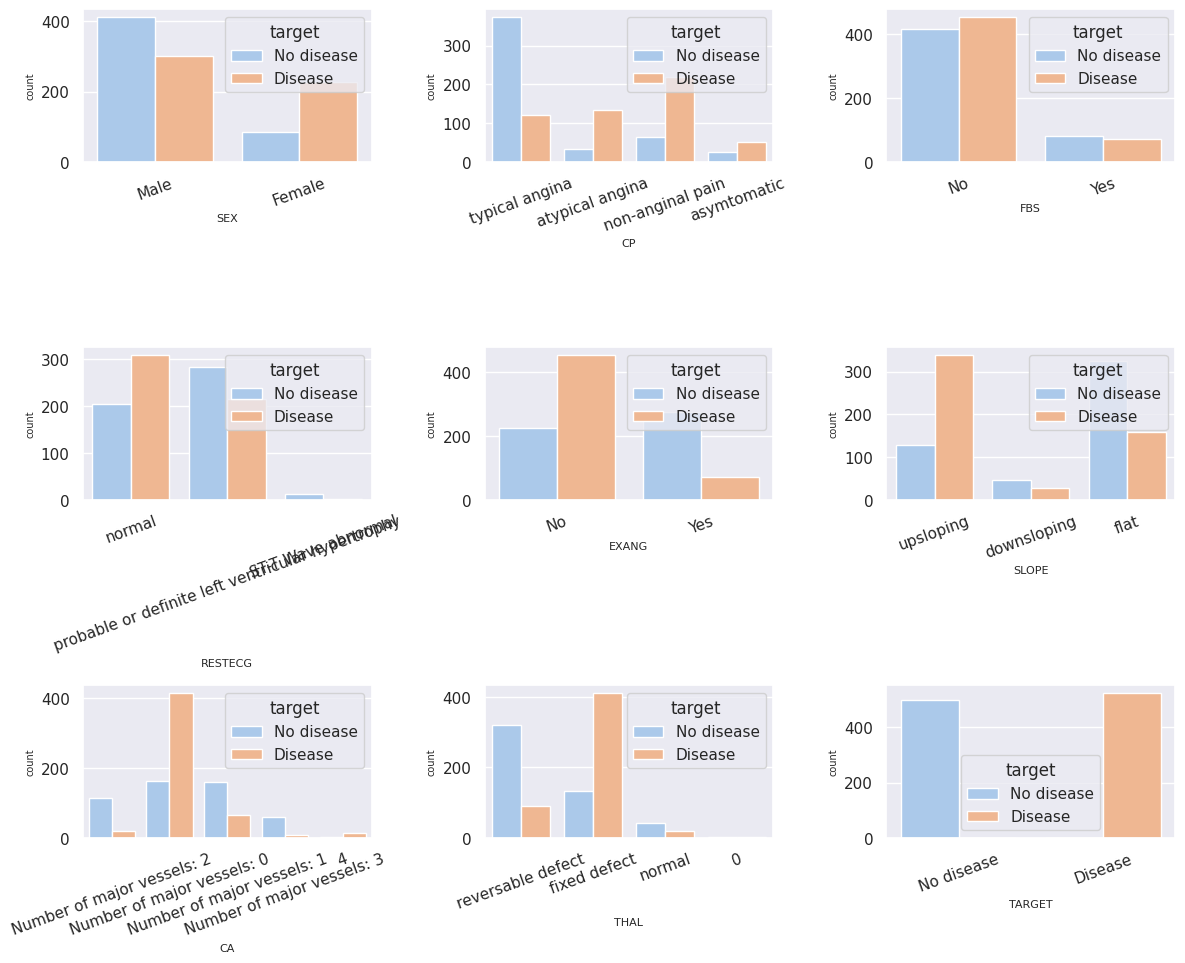

In [40]:
# Visualisasi kategorikal
plt.figure(figsize=(12,12))
for index, column in enumerate(categorical_col):
    plt.subplot(4, 3, index+1)
    sns.countplot(data=categorical_col,x=column, hue='target', palette='pastel')
    plt.xlabel(column.upper(),fontsize=8)
    plt.ylabel("count", fontsize=7)
    plt.xticks(rotation=20)

plt.tight_layout(pad = 1)
plt.show()

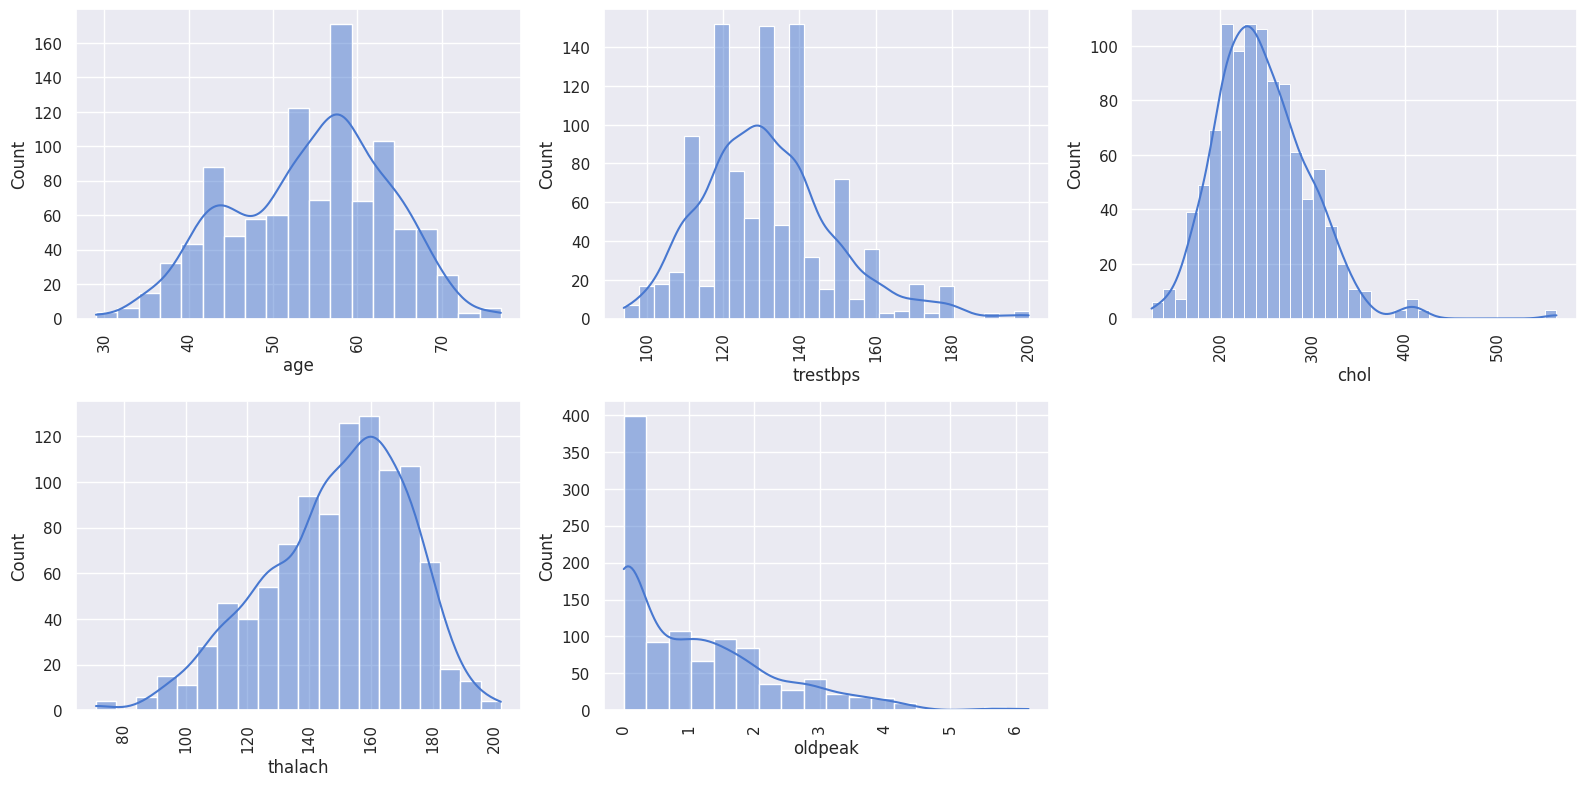

In [41]:
# Visualisasi numerical
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

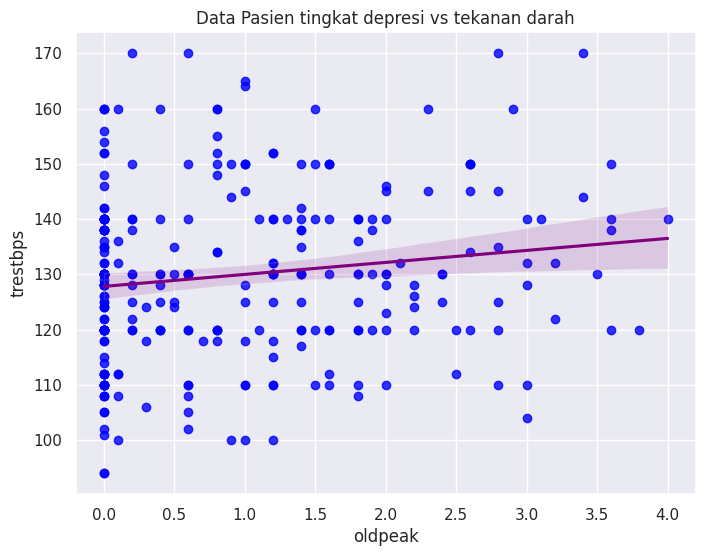

In [42]:
# melihat korelasi tingkat depresi dan tekanan darah
plt.figure(figsize = (8,6))
sns.regplot(x=data.oldpeak, y=data.trestbps, scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Data Pasien tingkat depresi vs tekanan darah')
plt.show()

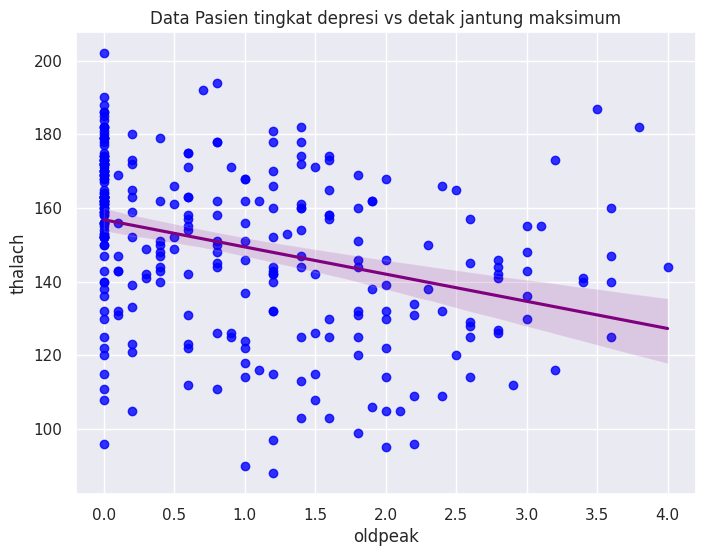

In [43]:
# melihat korelasi tingkat depresi dan detak jantung maksimum
plt.figure(figsize = (8,6))
sns.regplot(x=data.oldpeak, y=data.thalach, scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title ('Data Pasien tingkat depresi vs detak jantung maksimum')
plt.show()

Text(0, 0.5, 'Oldpeak Level')

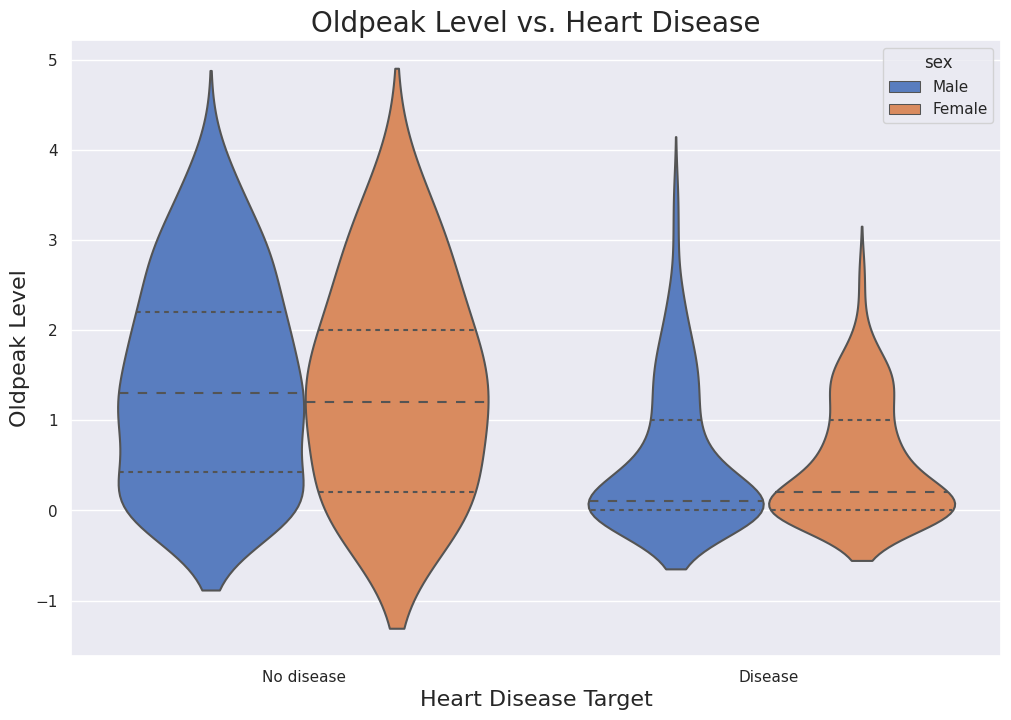

In [44]:
# # Korelasi tingkat depresi dan target

plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak', hue="sex", inner='quartile', data= data )
plt.title("Oldpeak Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Oldpeak Level", fontsize=16)

In [45]:
# Data dikembalikan seperti semula

data['sex'] = data['sex'].replace({'Male' : 1,'Female': 0})
data['cp'] = data['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
data['fbs'] = data['fbs'].replace({'No' : 0, 'Yes' : 1})
data['restecg'] = data['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
data['exang'] = data['exang'].replace({'No':0,'Yes':1})
data['slope'] = data['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
data['thal'] = data['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
data['ca'] = data['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
data['target'] = data['target'].replace({'No disease':0,'Disease':1})

In [46]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


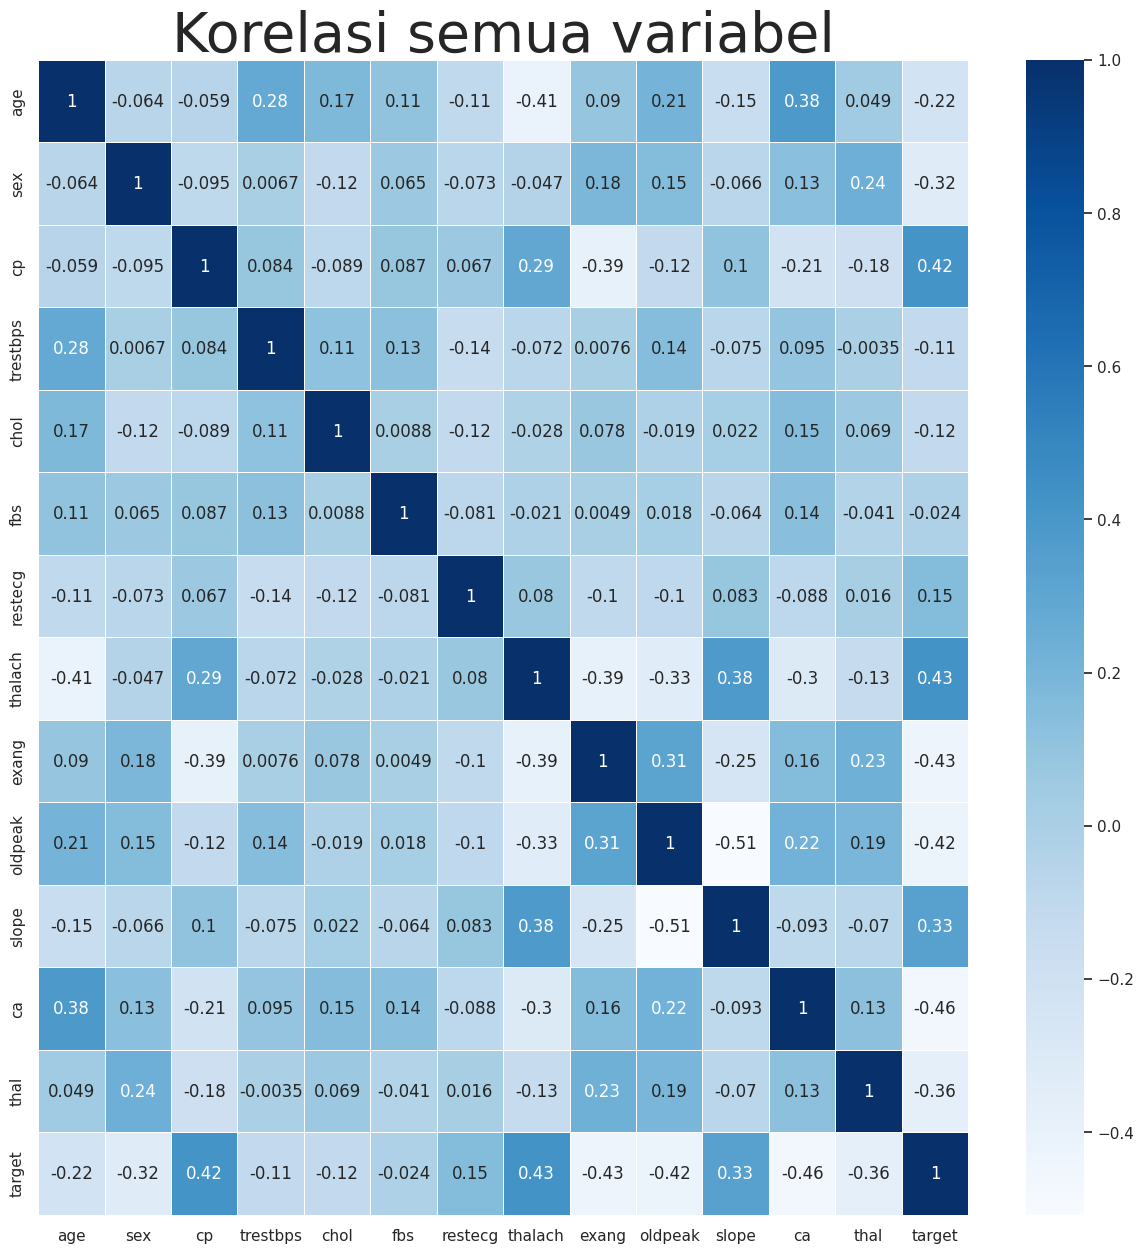

In [47]:
# melihat korelasi antar variable untuk mencari feature yang penting
plt.figure(figsize=(15,15))
cor = data.corr()
sns.heatmap(cor,annot=True, linewidth=.5, cmap="Blues")
plt.title('Korelasi semua variabel', fontsize = 40)
plt.show()

In [48]:
cor_matrix = data.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.063761,-0.058799,0.279417,0.170718,0.106626,-0.105476,-0.408871,0.090475,0.208192,-0.150192,0.383754,0.049278,-0.221707
sex,-0.063761,1.000000,-0.095310,0.006681,-0.116010,0.064692,-0.073261,-0.046619,0.183273,0.152389,-0.066323,0.131191,0.240080,-0.322153
cp,-0.058799,-0.095310,1.000000,0.084011,-0.089289,0.086787,0.066766,0.289426,-0.388198,-0.115616,0.104824,-0.214689,-0.182183,0.420655
trestbps,0.279417,0.006681,0.084011,1.000000,0.110700,0.127345,-0.144862,-0.072463,0.007578,0.144838,-0.074968,0.095113,-0.003514,-0.113330
chol,0.170718,-0.116010,-0.089289,0.110700,1.000000,0.008797,-0.118245,-0.027854,0.077919,-0.018937,0.021588,0.147153,0.069224,-0.115837
fbs,0.106626,0.064692,0.086787,0.127345,0.008797,1.000000,-0.081489,-0.021025,0.004942,0.017652,-0.064412,0.139730,-0.040742,-0.023889
restecg,-0.105476,-0.073261,0.066766,-0.144862,-0.118245,-0.081489,1.000000,0.079601,-0.104458,-0.099767,0.083141,-0.088420,0.015930,0.153307
thalach,-0.408871,-0.046619,0.289426,-0.072463,-0.027854,-0.021025,0.079601,1.000000,-0.390062,-0.333715,0.378005,-0.303702,-0.134240,0.425990
exang,0.090475,0.183273,-0.388198,0.007578,0.077919,0.004942,-0.104458,-0.390062,1.000000,0.313677,-0.253758,0.157464,0.231151,-0.430786
oldpeak,0.208192,0.152389,-0.115616,0.144838,-0.018937,0.017652,-0.099767,-0.333715,0.313677,1.000000,-0.507969,0.222346,0.189966,-0.423616


In [49]:
#Mengurutkan korelasi
cor_matrix['target'].sort_values()

ca         -0.464504
exang      -0.430786
oldpeak    -0.423616
thal       -0.360747
sex        -0.322153
age        -0.221707
chol       -0.115837
trestbps   -0.113330
fbs        -0.023889
restecg     0.153307
slope       0.333596
cp          0.420655
thalach     0.425990
target      1.000000
Name: target, dtype: float64

1. 'cp', 'thalach', dan 'slope' memiliki nilai positif cukup kuat dengan 'target'.
2. 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' memiliki nilai cukup kuat dengan 'target'.
3. 'fbs', 'chol', 'trestbps', dan 'restecg' memiliki nilai yang lemah dengan 'target'.

Feature yang dipilih yaitu :'cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' untuk dianalisa lebih lanjut.

In [50]:
variabel = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age']
analyze = data[variabel]

In [51]:
analyze.head()

,cp,thalach,slope,oldpeak,exang,ca,thal,sex,age
0,0,168,2,1.0,0,2,3,1,52
1,0,155,0,3.1,1,0,3,1,53
2,0,125,0,2.6,1,0,3,1,70
3,0,161,2,0.0,0,1,3,1,61
4,0,106,1,1.9,0,3,2,0,62


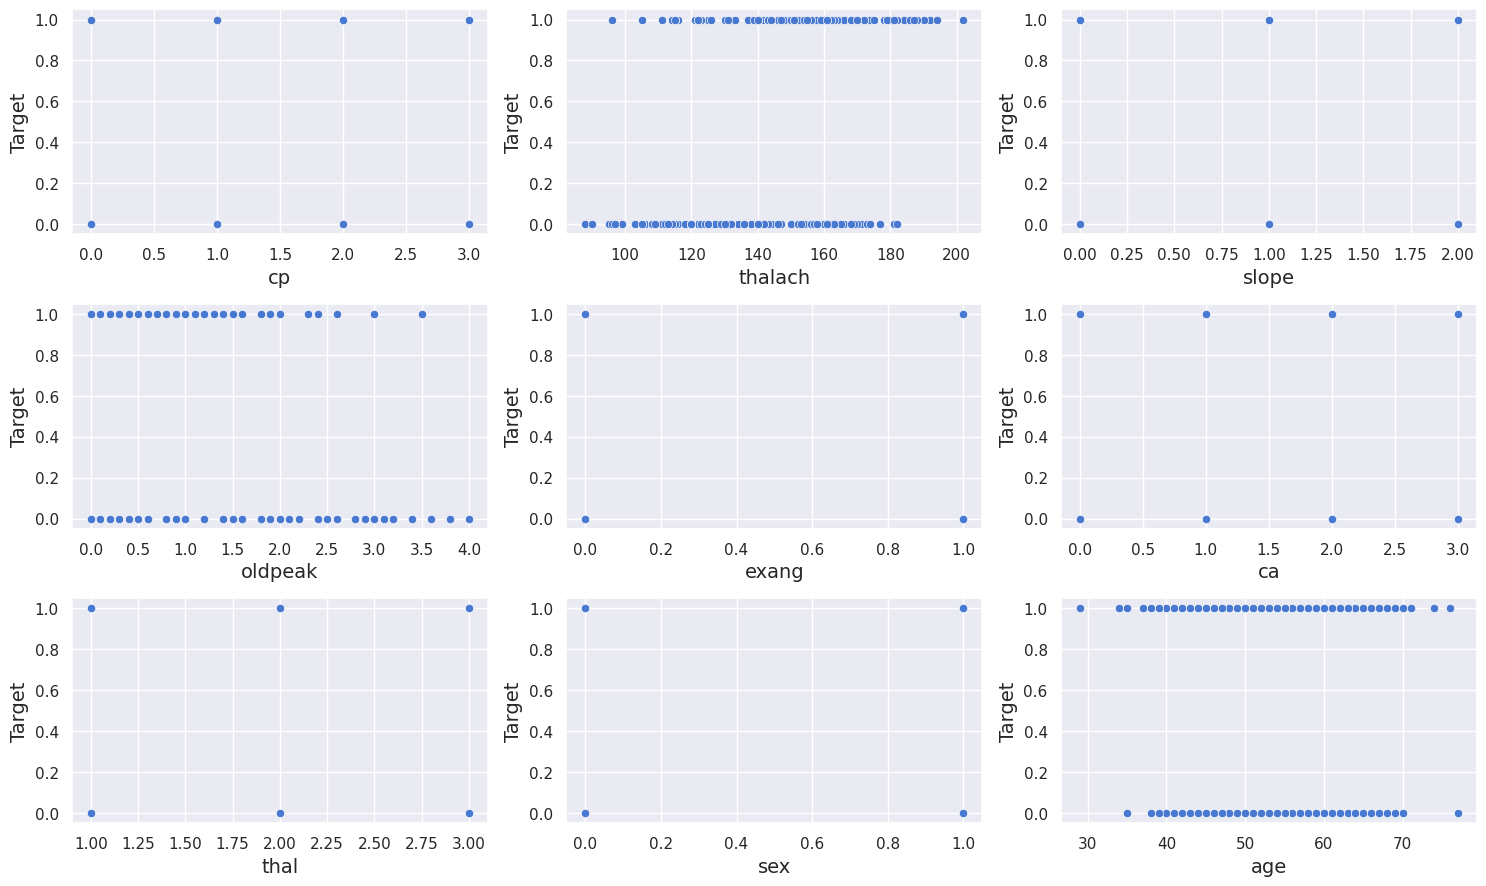

In [52]:
# Informasi variabel ke target
fig = plt.figure(figsize=(15,9))
for index in range(len(analyze.columns)):
    plt.subplot(3,3,index + 1)
    sns.scatterplot(x = analyze.iloc[:,index],y=data.target,data = analyze)
    plt.xlabel(analyze.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

### Scaling data

In [53]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop("target", axis=1))

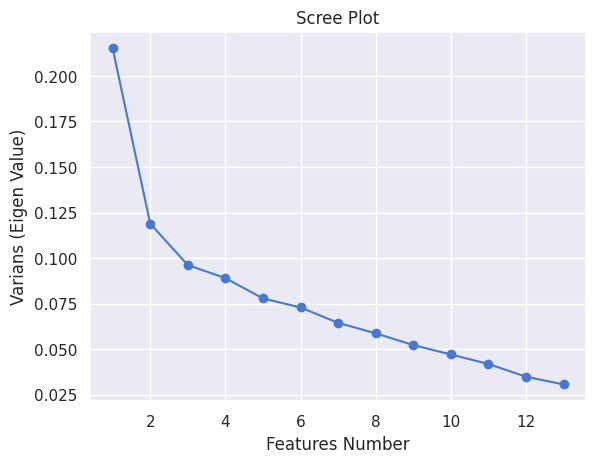

In [54]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Features Number')
plt.ylabel('Varians (Eigen Value)')
plt.title('Scree Plot')
plt.show()

In [55]:
pca = PCA(n_components=9)
heart_data_reduced = pca.fit_transform(X_scaled)

In [56]:
feature_names = data.drop('target', axis=1).columns.to_list()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

for component, component_name in zip(pca.components_, component_names):
    feature_indices = component.argsort()[::-1]
    retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
    print(f"{component_name}: {retained_features}")

PC1: ['oldpeak', 'exang', 'ca', 'age', 'thal', 'sex', 'trestbps', 'chol', 'fbs']
PC2: ['trestbps', 'age', 'cp', 'fbs', 'chol', 'ca', 'slope', 'thalach', 'oldpeak']
PC3: ['cp', 'oldpeak', 'fbs', 'sex', 'trestbps', 'restecg', 'thalach', 'exang', 'age']
PC4: ['restecg', 'age', 'oldpeak', 'exang', 'chol', 'cp', 'ca', 'trestbps', 'slope']
PC5: ['restecg', 'ca', 'age', 'fbs', 'slope', 'thal', 'sex', 'cp', 'oldpeak']
PC6: ['fbs', 'ca', 'exang', 'slope', 'sex', 'age', 'thalach', 'oldpeak', 'chol']
PC7: ['fbs', 'chol', 'restecg', 'thal', 'exang', 'thalach', 'oldpeak', 'cp', 'ca']
PC8: ['ca', 'cp', 'chol', 'oldpeak', 'thalach', 'sex', 'thal', 'age', 'fbs']
PC9: ['sex', 'restecg', 'chol', 'ca', 'thalach', 'trestbps', 'oldpeak', 'exang', 'slope']


In [57]:
variable = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age', 'target']
data = data[variable]

### Modeling

In [58]:
data.head()

,cp,thalach,slope,oldpeak,exang,ca,thal,sex,age,target
0,0,168,2,1.0,0,2,3,1,52,0
1,0,155,0,3.1,1,0,3,1,53,0
2,0,125,0,2.6,1,0,3,1,70,0
3,0,161,2,0.0,0,1,3,1,61,0
4,0,106,1,1.9,0,3,2,0,62,0


In [59]:
# Define X and y
X = data.loc[:, ~data.columns.isin(["target"])]
y = data.target

In [60]:
# Melihat kolom yang termasuk variable indepnden
X.head()

,cp,thalach,slope,oldpeak,exang,ca,thal,sex,age
0,0,168,2,1.0,0,2,3,1,52
1,0,155,0,3.1,1,0,3,1,53
2,0,125,0,2.6,1,0,3,1,70
3,0,161,2,0.0,0,1,3,1,61
4,0,106,1,1.9,0,3,2,0,62


In [61]:
# Melihat variabel dependen
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [62]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
X_scaled

array([[-0.9511941 ,  0.80265191,  0.96083001, ...,  1.18588659,
         0.65192024, -0.22594065],
       [-0.9511941 ,  0.22844351, -2.35840093, ...,  1.18588659,
         0.65192024, -0.115867  ],
       [-0.9511941 , -1.09665282, -2.35840093, ...,  1.18588659,
         0.65192024,  1.75538503],
       ...,
       [-0.9511941 ,  0.49346277,  0.96083001, ...,  1.18588659,
         0.65192024, -0.22594065],
       [ 1.96375555, -1.09665282,  0.96083001, ..., -0.52973614,
         0.65192024,  0.54457489],
       [-0.9511941 , -1.62669135, -0.69878546, ...,  1.18588659,
         0.65192024, -0.00579335]])

In [64]:
# Mendefinisikan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.2, random_state=100)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(228, 9)
(57, 9)
(228,)
(57,)


In [65]:
clf_lr = LogisticRegression()
# train the classifier
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Logistic Regression Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistic Regression Classifier is  0.8245614035087719


In [66]:
print("The Classification Report of Logistic Regression Classifer")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression Classifer
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.84      0.84      0.84        31

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



In [67]:
clf_dt = DecisionTreeClassifier()
# train the classifier
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred))
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7192982456140351
The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.76      0.71      0.73        31

    accuracy                           0.72        57
   macro avg       0.72      0.72      0.72        57
weighted avg       0.72      0.72      0.72        57



In [68]:
clf_rf = RandomForestClassifier()
# train the classifier
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred))
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.7894736842105263
The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        26
           1       0.77      0.87      0.82        31

    accuracy                           0.79        57
   macro avg       0.79      0.78      0.78        57
weighted avg       0.79      0.79      0.79        57



In [69]:
clf_knn = KNeighborsClassifier()
# train the classifier
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
# printing the test accuracy
print("The test accuracy score of K-Nearest Neighbors Classifier is ", accuracy_score(y_test, y_pred))
print("The Classification Report of K-Nearest Neighbors Classifier")
print(classification_report(y_test, y_pred))

The test accuracy score of K-Nearest Neighbors Classifier is  0.7894736842105263
The Classification Report of K-Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.79      0.84      0.81        31

    accuracy                           0.79        57
   macro avg       0.79      0.78      0.79        57
weighted avg       0.79      0.79      0.79        57



In [70]:
clf_svm = SVC()
# train the classifier
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Support Vector Machine Classifier is ", accuracy_score(y_test, y_pred))
print("The Classification Report of Support Vector Machine Classifier")
print(classification_report(y_test, y_pred))

The test accuracy score of Support Vector Machine Classifier is  0.8070175438596491
The Classification Report of Support Vector Machine Classifier
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.78      0.90      0.84        31

    accuracy                           0.81        57
   macro avg       0.82      0.80      0.80        57
weighted avg       0.81      0.81      0.80        57



In [71]:
clf_nb = GaussianNB()
# train the classifier
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Naives Bayes Classifier is ", accuracy_score(y_test, y_pred))
print ("The Classification Report of Naives Bayes Classifier")
print(classification_report(y_test, y_pred))

The test accuracy score of Naives Bayes Classifier is  0.7894736842105263
The Classification Report of Naives Bayes Classifier
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.83      0.77      0.80        31

    accuracy                           0.79        57
   macro avg       0.79      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57



In [72]:
clf_xgb = XGBClassifier()
# train the classifier
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)
# printing the test accuracy
print("The test accuracy score of XG Boost Classifier is ", accuracy_score(y_test, y_pred))
print("The Classification Report of XG Boost Classifier")
print(classification_report(y_test, y_pred))

The test accuracy score of XG Boost Classifier is  0.7894736842105263
The Classification Report of XG Boost Classifier
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.76      0.90      0.82        31

    accuracy                           0.79        57
   macro avg       0.80      0.78      0.78        57
weighted avg       0.80      0.79      0.79        57



In [73]:
clf_mlp = MLPClassifier()
# train the classifier
clf_mlp.fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test, y_pred))
print("The Classification Report of MLP Classifier")
print(classification_report(y_test, y_pred))

The test accuracy score of MLP Classifier is  0.8070175438596491
The Classification Report of MLP Classifier
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.81      0.84      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### test

In [74]:
# Logistic regression classifier with hyperparameter
clf_lr = LogisticRegression()

param_grid1 = {
    'max_iter': [30, 50, 100, 150],
    'multi_class': ['auto'],
    'solver' : ['lbfgs', 'newton-cholesky']
}

gs1 = GridSearchCV(
        estimator= clf_lr,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_lr = gs1.fit(X_train, y_train)

print(fit_clf_lr.best_score_)
print(fit_clf_lr.best_params_)

0.8511111111111112
{'max_iter': 30, 'multi_class': 'auto', 'solver': 'lbfgs'}


In [75]:
# Random Forest classifier with hyperparameter
clf_rf = RandomForestClassifier()

param_grid1 = {'n_estimators': [100, 200, 300, 400],
               'max_depth': [3, 5, 7, 9],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf_rf,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_rf = gs1.fit(X_train, y_train)

print(fit_clf_rf.best_score_)
print(fit_clf_rf.best_params_)

0.8639613526570049
{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}


In [76]:
y_pred = fit_clf_rf.predict(X_test)
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.82      0.90      0.86        31

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [77]:
# Decision Tree classifier with hyperparameter
clf_dt = DecisionTreeClassifier()

param_grid1 = {'min_samples_leaf': [1, 10, 100],
               'max_depth': [1, 10, 20, 30],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf_dt,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_dt = gs1.fit(X_train, y_train)

print(fit_clf_dt.best_score_)
print(fit_clf_dt.best_params_)

0.846473429951691
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}


In [78]:
y_pred = fit_clf_dt.predict(X_test)
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.82      0.90      0.86        31

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [79]:
# K-Nearest Neighbors Classifier with hyperparameter
clf_knn = KNeighborsClassifier()

param_grid1 = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

gs1 = GridSearchCV(
        estimator=clf_knn,
        param_grid=param_grid1,
        cv=5,
        scoring='accuracy'
        )

fit_clf_knn = gs1.fit(X_train, y_train)

print(fit_clf_knn.best_score_)
print(fit_clf_knn.best_params_)

0.8555555555555555
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [80]:
y_pred = fit_clf_knn.predict(X_test)
print("The Classification Report of K_Nearest Neighbors Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of K_Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.80      0.90      0.85        31

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57



In [81]:
# Support Machine Classifier with hyperparameter
clf_svm = SVC(probability=True)

param_grid1 = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 1, 'scale']}

gs1 = GridSearchCV(
        estimator=clf_svm,
        param_grid = param_grid1,
        cv=5,
        scoring='accuracy'
    )

fit_clf_svm = gs1.fit(X_train, y_train)

print(fit_clf_svm.best_score_)
print(fit_clf_svm.best_params_)

0.8509178743961353
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [82]:
y_pred = fit_clf_svm.predict(X_test)
print("The Classification Report of Support Vector Machine Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Support Vector Machine Classifier
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.78      0.90      0.84        31

    accuracy                           0.81        57
   macro avg       0.82      0.80      0.80        57
weighted avg       0.81      0.81      0.80        57



In [83]:
# Naives Bayes Classifier with hyperparameter
clf_nb = GaussianNB()

param_grid1 = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

gs1 = GridSearchCV(
        estimator=clf_nb,
        param_grid = param_grid1,
        cv=5,
        scoring='accuracy'
    )

fit_clf_nb = gs1.fit(X_train, y_train)

print(fit_clf_nb.best_score_)
print(fit_clf_nb.best_params_)

0.8379710144927536
{'var_smoothing': 1e-09}


In [84]:
y_pred = fit_clf_nb.predict(X_test)
print("The Classification Report of Naives Bayes Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Naives Bayes Classifier
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.83      0.77      0.80        31

    accuracy                           0.79        57
   macro avg       0.79      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57



In [85]:
# XG Boost Classifier with hyperparameter
clf_xgb = XGBClassifier()

param_grid1 = {'learning_rate': [0.01, 0.1, 0.2],
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 4, 5],}

gs1 = GridSearchCV(
        estimator=clf_xgb,
        param_grid = param_grid1,
        cv=5,
        scoring='accuracy'
    )

fit_clf_xgb = gs1.fit(X_train, y_train)

print(fit_clf_xgb.best_score_)
print(fit_clf_xgb.best_params_)

0.8510144927536232
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [86]:
y_pred = fit_clf_xgb.predict(X_test)
print("The Classification Report of XG Boost Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of XG Boost Classifier
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        26
           1       0.77      0.87      0.82        31

    accuracy                           0.79        57
   macro avg       0.79      0.78      0.78        57
weighted avg       0.79      0.79      0.79        57



In [87]:
# MLP Classifier with hyperparameter
clf_mlp = MLPClassifier()

param_grid1 = {'hidden_layer_sizes': [1, 10, 20, 30],
               'activation': ['tanh', 'relu'],
               'solver': ['lbfgs', 'adam', 'sgd']}

gs1 = GridSearchCV(
        estimator=clf_mlp,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_mlp = gs1.fit(X_train, y_train)

print(fit_clf_mlp.best_score_)
print(fit_clf_mlp.best_params_)

0.8598067632850241
{'activation': 'tanh', 'hidden_layer_sizes': 30, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [88]:
y_pred = fit_clf_mlp.predict(X_test)
print("The Classification Report of MLP Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of MLP Classifier
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [89]:
# Predict the probabilities for the positive class
y_pred_logreg = fit_clf_lr.predict_proba(X_test)[:, 1]
y_pred_rf = fit_clf_rf.predict_proba(X_test)[:, 1]
y_pred_dt= fit_clf_dt.predict_proba(X_test)[:, 1]
y_pred_knn= fit_clf_knn.predict_proba(X_test)[:, 1]
y_pred_svm= fit_clf_svm.predict_proba(X_test)[:, 1]
y_pred_nb= fit_clf_nb.predict_proba(X_test)[:, 1]
y_pred_xgb= fit_clf_xgb.predict_proba(X_test)[:, 1]
y_pred_mlp= fit_clf_mlp.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_knn = roc_auc_score(y_test, y_pred_knn)
auc_svm = roc_auc_score(y_test, y_pred_svm)
auc_nb = roc_auc_score(y_test, y_pred_nb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for K-Nearest Neighbors: {auc_knn}")
print(f"AUC-ROC for Support Vector Machine: {auc_svm}")
print(f"AUC-ROC for Naives Bayes: {auc_nb}")
print(f"AUC-ROC for XGBoost: {auc_xgb}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.9181141439205955
AUC-ROC for Random Forest: 0.870967741935484
AUC-ROC for Decision Tree: 0.8529776674937966
AUC-ROC for K-Nearest Neighbors: 0.8715880893300249
AUC-ROC for Support Vector Machine: 0.892059553349876
AUC-ROC for Naives Bayes: 0.9143920595533498
AUC-ROC for XGBoost: 0.8870967741935485
AUC-ROC for MLP: 0.9106699751861043


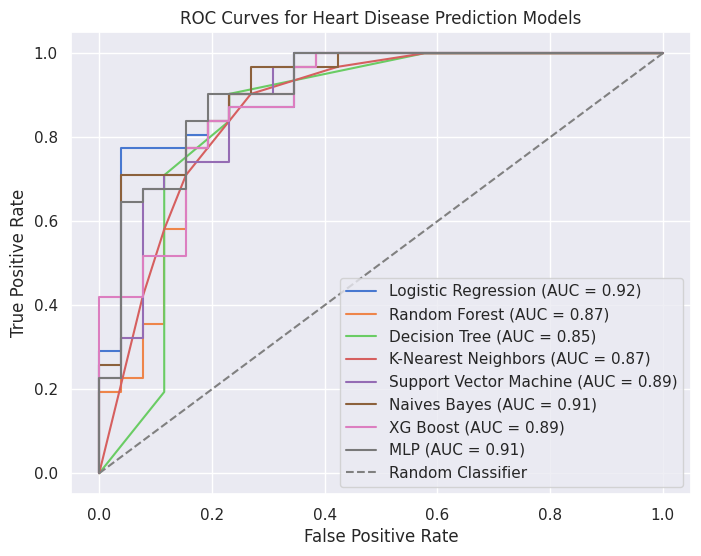

In [90]:
#Membuat ROC Analisis
def plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_knn, y_pred_svm, y_pred_nb, y_pred_xgb,y_pred_mlp):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
    fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')
    plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_svm:.2f})')
    plt.plot(fpr_nb, tpr_nb, label=f'Naives Bayes (AUC = {auc_nb:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, label=f'XG Boost (AUC = {auc_xgb:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')


    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_knn, y_pred_svm, y_pred_nb, y_pred_xgb, y_pred_mlp)

In [91]:
def find_rates_for_thresholds(y_test, y_pred, threshold):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_test, y_pred_logreg, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(y_test, y_pred_rf, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(y_test, y_pred_dt, thresholds)
fpr_knn, tpr_knn = find_rates_for_thresholds(y_test, y_pred_knn, thresholds)
fpr_svm, tpr_svm = find_rates_for_thresholds(y_test, y_pred_svm, thresholds)
fpr_nb, tpr_nb = find_rates_for_thresholds(y_test, y_pred_nb, thresholds)
fpr_xgb, tpr_xgb = find_rates_for_thresholds(y_test, y_pred_xgb, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(y_test, y_pred_mlp, thresholds)

'''TODO: Silahkan buat Summary DataFrame'''
summary_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR_logreg' : fpr_logreg,
    'FPR_rf' : fpr_rf,
    'FPR_dt' : fpr_dt,
    'FPR_knn' : fpr_knn,
    'FPR_svm' : fpr_svm,
    'FPR_nb' : fpr_nb,
    'FPR_xgb' : fpr_xgb,
    'FPR_mlp' : fpr_mlp,
    'TPR_logreg' : tpr_logreg,
    'TPR_rf' : tpr_rf,
    'TPR_dt' : tpr_dt,
    'TPR_knn' : tpr_knn,
    'TPR_svm' : tpr_svm,
    'TPR_nb' : tpr_nb,
    'TPR_xgb' : tpr_xgb,
    'TPR_mlp' : tpr_mlp})

print(summary_df)

    Threshold  FPR_logreg    FPR_rf    FPR_dt   FPR_knn   FPR_svm    FPR_nb  \
0         0.0    1.000000  1.000000  0.615385  0.576923  1.000000  1.000000   
1         0.1    0.461538  0.807692  0.615385  0.576923  0.461538  0.269231   
2         0.2    0.384615  0.576923  0.346154  0.423077  0.346154  0.230769   
3         0.3    0.346154  0.423077  0.230769  0.346154  0.307692  0.230769   
4         0.4    0.346154  0.346154  0.230769  0.346154  0.307692  0.192308   
5         0.5    0.192308  0.230769  0.230769  0.269231  0.269231  0.192308   
6         0.6    0.153846  0.192308  0.230769  0.153846  0.230769  0.153846   
7         0.7    0.038462  0.115385  0.230769  0.153846  0.115385  0.076923   
8         0.8    0.038462  0.076923  0.115385  0.115385  0.076923  0.076923   
9         0.9    0.038462  0.000000  0.115385  0.076923  0.038462  0.038462   
10        1.0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     FPR_xgb   FPR_mlp  TPR_logreg    TPR_rf    TPR

In [92]:
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    optimal_idx = np.argmax(tpr-fpr)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(y_test, y_pred_dt)
best_threshold_knn = find_best_threshold(y_test, y_pred_knn)
best_threshold_svm = find_best_threshold(y_test, y_pred_svm)
best_threshold_nb = find_best_threshold(y_test, y_pred_nb)
best_threshold_xgb = find_best_threshold(y_test, y_pred_xgb)
best_threshold_mlp = find_best_threshold(y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for K-Nearest Neighbors: {best_threshold_knn}")
print(f"Best threshold for Support Vector Machine: {best_threshold_svm}")
print(f"Best threshold for Naives Bayes: {best_threshold_nb}")
print(f"Best threshold for XG Boost: {best_threshold_xgb}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

Best threshold for Logistic Regression: 0.6858450646002519
Best threshold for Random Forest: 0.5049735515960996
Best threshold for Decision Tree: 0.6666666666666666
Best threshold for K-Nearest Neighbors: 0.5714285714285714
Best threshold for Support Vector Machine: 0.5319406352826882
Best threshold for Naives Bayes: 0.048729471821030525
Best threshold for XG Boost: 0.7240317463874817
Best threshold for MLP: 0.4698858702045526


In [93]:
import pickle
# Menyimpan model terbaik dengan pickle
pklname = "best_model_lr.pkl"

with open(pklname, 'wb') as file:
    pickle.dump(fit_clf_lr, file)